### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('reliance_news_sentiment.csv')
df.head()

,published_at,title,description,url,sentiment,sentiment_score
0,2021-10-21T14:40:39+00:00,Exclusive: Industrialist Nikhil Merchant leads...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.711336
1,2021-10-21T13:52:13+00:00,India’s Reliance gets shareholders’ nod to add...,BENGALURU &#8212; India&#8217;s Reliance Indus...,https://financialpost.com/pmn/business-pmn/ind...,neutral,0.800176
2,2021-10-21T12:45:52+00:00,Rogers misses quarterly revenue estimates,Rogers Communications Inc reported third-quart...,https://torontosun.com/business/money-news/rog...,negative,0.973185
3,2021-10-21T12:40:35+00:00,Exclusive: Tycoon Nikhil Merchant leads race f...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.619371
4,2021-10-21T11:43:53+00:00,BP to Open Fuel Station in India Amid Record P...,BP and Reliance Industries signed a $6 billion...,https://sputniknews.com/20211021/bp-to-open-fu...,positive,0.929962


In [4]:
df1=df[['description']]
df1.head()

,description
0,Low-profile Gujarat businessman wants to add P...
1,BENGALURU &#8212; India&#8217;s Reliance Indus...
2,Rogers Communications Inc reported third-quart...
3,Low-profile Gujarat businessman wants to add P...
4,BP and Reliance Industries signed a $6 billion...


### Data Exploration

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  653 non-null    object
dtypes: object(1)
memory usage: 5.2+ KB


In [6]:
df1.duplicated().sum()

26

In [6]:
df2=df1.drop_duplicates()

### Preprocessing

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # Tokenize text and lemmatize each word
    tokens = nltk.word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]
    text = " ".join(text)
    return text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df2["processed_text"] = df2["description"].apply(clean)

C:\Users\vamsh\AppData\Local\Temp\ipykernel_45356\1738714249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["processed_text"] = df2["description"].apply(clean)


In [9]:
df2.head()

,description,processed_text
0,Low-profile Gujarat businessman wants to add P...,lowprofile gujarat businessman want add pipava...
1,BENGALURU &#8212; India&#8217;s Reliance Indus...,bengaluru reliance industry ltd said thursday ...
2,Rogers Communications Inc reported third-quart...,rogers communication inc reported thirdquarter...
4,BP and Reliance Industries signed a $6 billion...,bp reliance industry signed billion agreement ...
5,"In 2019, BP had bought a 49 per cent stake in ...",bp bought per cent stake petrol pump aviation ...


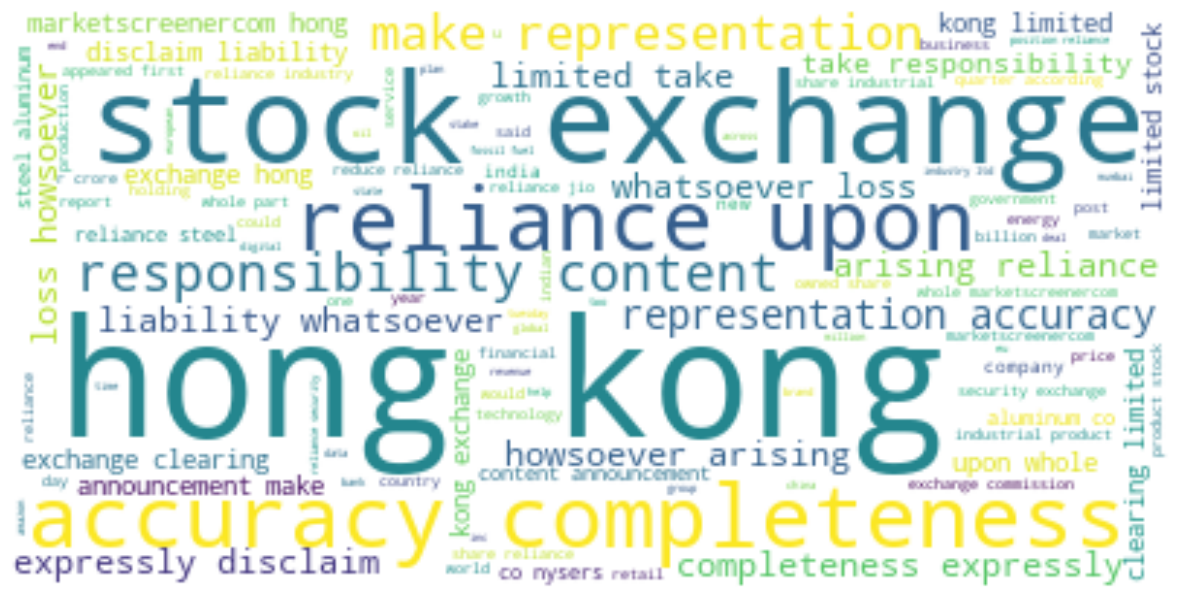

In [11]:
from wordcloud import WordCloud
text = " ".join(i for i in df2['processed_text'])
stopwords = set(stopwords)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###### Now I will analyze the sentiments of Amazon reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df2['processed_text']]
df2["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df2['processed_text']]
df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df2['processed_text']]
df2 = df2[["processed_text", "Positive", "Negative", "Neutral"]]
print(df2.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vamsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\vamsh\AppData\Local\Temp\ipykernel_45356\3508677798.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df2['processed_text']]
C:\Users\vamsh\AppData\Local\Temp\ipykernel_45356\3508677798.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Negative"] = [sentiments.

                                      processed_text  Positive  Negative  \
0  lowprofile gujarat businessman want add pipava...     0.115     0.000   
1  bengaluru reliance industry ltd said thursday ...     0.088     0.000   
2  rogers communication inc reported thirdquarter...     0.058     0.205   
4  bp reliance industry signed billion agreement ...     0.216     0.000   
5  bp bought per cent stake petrol pump aviation ...     0.000     0.000   

   Neutral  
0    0.885  
1    0.912  
2    0.737  
4    0.784  
5    1.000  


C:\Users\vamsh\AppData\Local\Temp\ipykernel_45356\3508677798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df2['processed_text']]


In [13]:
x = sum(df2["Positive"])
y = sum(df2["Negative"])
z = sum(df2["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂")
sentiment_score(x, y, z)

Neutral 🙂


In [14]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  77.12199999999996
Negative:  54.54199999999999
Neutral:  495.33399999999887
